<a href="https://colab.research.google.com/github/jeangarcia77/Salary-Prediction-Analysis/blob/main/Salary_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.0
    Uninstalling matplotlib-3.4.0:
      Successfully uninstalled matplotlib-3.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [88]:
pip install matplotlib==3.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.4.0-cp37-cp37m-manylinux1_x86_64.whl (10.3 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dython 0.7.1.post3 requires matplotlib>=3.4.3, but you have matplotlib 3.4.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
#import accuracy, precision, recall, classification report, and confusion matrix scoring functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from dython.nominal import associations
from sklearn import set_config
set_config(display='diagram')


# **Load Data**

## **Salary Prediction**



*   **Source of data**: [Kaggle](https://www.kaggle.com/datasets/ayessa/salary-prediction-classification)

*   **Description**: This data extraction by Barry Becker from the 1994 Census database. The prediction task is to determine whether a person makes less or equal to $50k or more a year. The dataset includes numerical and categorical data. 

*   **Target**: Salary
*   This is a **Classification** problem


*   **Features**: 14 total


*   **Rows**: 32,537


*   **Challenges**: Since the data derives from old census data, there may be data that is missing. Real world data seems to have challenges with possible inconsistent values due to user error or incorrect dates.





In [90]:
filename = '/content/drive/MyDrive/07 Week 7: Classification Models/salary.csv'
df_salary = pd.read_csv(filename)
df_salary.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [91]:
df_salary['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [92]:
# Rows in dataset
df_salary.value_counts().sum()

32561

In [93]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# **Identify and address any duplicate values**

In [94]:
df_salary.duplicated().sum()

24

In [95]:
df_salary.drop_duplicates(inplace=True)

In [96]:
# Confirm duplicates have been dropped

df_salary.duplicated().sum()

0

# **Identify any missing values**

In [97]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  salary          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [98]:
df_salary.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

# **Identify and address any inconsistencies in values**

In [99]:
df_salary.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
salary                2
dtype: int64

In [100]:
# ?
df_salary['native-country'].value_counts()

 United-States                 29153
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [101]:
# ? value 
df_salary['occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: occupation, dtype: int64

In [102]:

# ? value contains considerable amount of data
df_salary['workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [103]:
df_salary['workclass'] = df_salary['workclass'].replace({' Private': 'Private'})

In [104]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  salary          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [105]:
# Column seems to contain unique values
df_salary['fnlwgt'].value_counts()

164190    13
123011    13
203488    13
148995    12
113364    12
          ..
138342     1
158040     1
232784     1
325573     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64

# **Data Visualizations**

In [106]:
# Majority of dataset values are within the less than or equal 50k salary range

df_salary['salary'].value_counts(normalize=True).round(2)

 <=50K    0.76
 >50K     0.24
Name: salary, dtype: float64

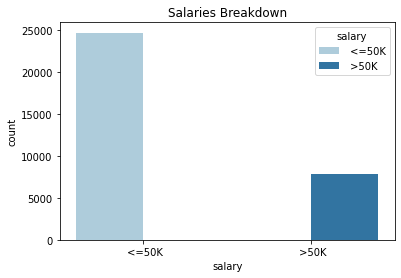

In [107]:
ax = sns.countplot(x=df_salary.salary , hue='salary', data= df_salary, palette='Paired')
ax.set_title('Salaries Breakdown')
plt.show(ax , df_salary)

In [108]:
# The majority of the dataset consists of Male values (67%) vs the minority Female values (33%)
df_gender = df_salary['sex'].value_counts(normalize=True).round(2)
df_gender

 Male      0.67
 Female    0.33
Name: sex, dtype: float64

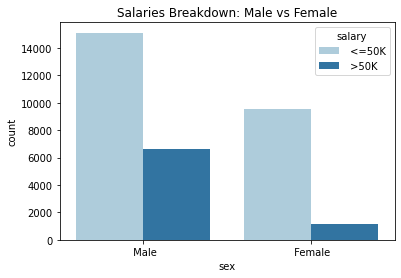

In [109]:
ax = sns.countplot( x=df_salary['sex'] , hue='salary', data= df_salary, palette='Paired')
ax.set_title('Salaries Breakdown: Male vs Female')
plt.show(ax , df_salary)


Dataset consists of a majority male values at a rate of 67% to the 33% of the female values. Imbalanced dataset may cause for bias towards Male values.

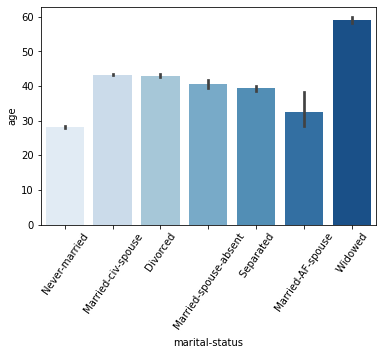

In [110]:
plt.xticks(rotation = 55)
sns.barplot(data=df_salary, x="marital-status", y="age" , palette='Blues');

Moderate correlation between Marital status and age

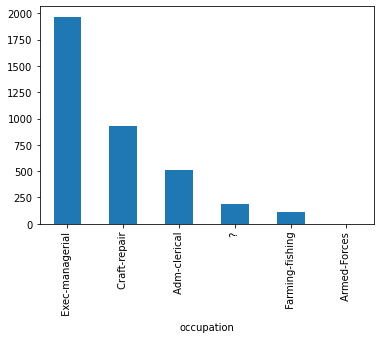

In [166]:
# Data of Top careers making equal to or greater than $50k

df_salary[df_salary.salary == 1].groupby(['occupation'])['salary'].count()[:6].sort_values(ascending=False).plot.bar();

Top occupations where individuals make equal to or greater than $50k.

In [145]:
high_salary = df_salary[df_salary.salary == 1].groupby(['occupation'])['salary'].value_counts().sum()
print(f'Number of people making greater than or equal to $50k is: {high_salary}')

Number of people making greater than or equal to $50k is: 7839


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


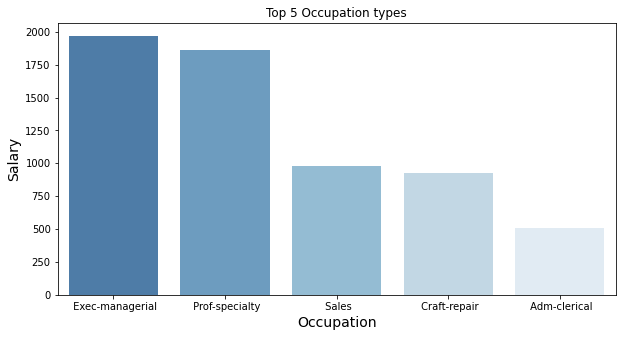

In [146]:
top5_occupations  = df_salary.groupby(['occupation'])['salary'].sum().sort_values(ascending=False)
top5_occupations = top5_occupations[:5,]
plt.figure(figsize=(10,5))
ax = sns.barplot(top5_occupations.index, top5_occupations.values, alpha=0.8, palette="Blues_r")
plt.title('Top 5 Occupation types')
plt.ylabel('Salary', fontsize=14)
plt.xlabel('Occupation', fontsize=14)
plt.show()

In [147]:
# Count of the many different occupations in our dataset

df_salary['occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: occupation, dtype: int64

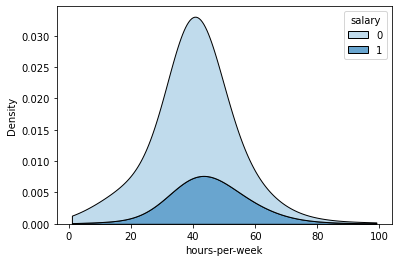

In [148]:
ax= sns.kdeplot(data=df_salary, x="hours-per-week", hue='salary', bw_adjust=5, cut=0, multiple='stack',palette='Blues')
# appropriate graph due to large population size                

Density curve of Hours per week worked for salaries less than or equal to 50k(0) and greater than 50k(1).

Mean is equal to **40.44**, which is the average work hours per week for the dataset for both categories.

In [149]:
df_salary['hours-per-week'].describe()

count    32537.000000
mean        40.440329
std         12.346889
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

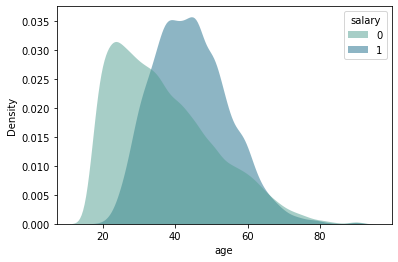

In [150]:
ax= sns.kdeplot(data=df_salary, x="age", hue='salary', fill=True,common_norm=False,alpha=.5,linewidth=0, palette='crest')

Density curve of Age for salaries less than or equal to 50k and greater than 50k.

Mean is equal to **38.56**, which is the average age for the dataset for both categories.

In [151]:
df_salary['age'].describe()

count    32537.000000
mean        38.585549
std         13.637984
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

## Correlation Heatmap between Numeric columns

In [ ]:
# Correalation Heatmap between data in numeric columns
corr = df_salary.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='Blues', annot=True);

Correlation between numeric features seem to not have any moderate/strong trends.

## Correlation Heatmap between Numeric and Categorical columns

In [ ]:
# Correlation Heatmap between Numeric and Categorical columns

associations(df_salary, figsize=(15, 15), cmap='Blues');

Strongest Correlation:


*   65% - Sex & Relationship

Moderate Correlation:
*   57% - Maritial Status & Age
*   56% - Occupation & Education-Num


*   49% - Maritial Status and Relationship


*   46% - Sex & Maritial Status
*   45% - Salary & Maritial Status


*   45% - Salary & Relationship








# **Identify any Outliers**

In [ ]:
df_salary.describe()

Dataset seems to have consistent values; there seems to be no impossible values initially. 

# **Data Preprocessing**

In [112]:
df_salary['salary'].value_counts(normalize = True)

 <=50K    0.759074
 >50K     0.240926
Name: salary, dtype: float64

In [113]:
df_salary['salary']= df_salary['salary'].replace({'<=50K': 0, '>50K': 1}, regex=True)

# regex=true made replace possible for binary
# reference - https://stackoverflow.com/questions/67409458/why-is-pandas-replace-method-not-working

In [114]:
df_salary.drop(["fnlwgt", "education-num"], axis = 1, inplace = True)

In [115]:
df_salary['salary'].value_counts()

0    24698
1     7839
Name: salary, dtype: int64

In [116]:
# Salary is the target
y = df_salary['salary']

# drop salary since it is the target. Dropped fnlwgt and education-num as they contain a majority of unique data points and have no value to our analysis
X = df_salary.drop('salary', axis=1)

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42)

In [117]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   education       32537 non-null  object
 3   marital-status  32537 non-null  object
 4   occupation      32537 non-null  object
 5   relationship    32537 non-null  object
 6   race            32537 non-null  object
 7   sex             32537 non-null  object
 8   capital-gain    32537 non-null  int64 
 9   capital-loss    32537 non-null  int64 
 10  hours-per-week  32537 non-null  int64 
 11  native-country  32537 non-null  object
 12  salary          32537 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 4.5+ MB


In [118]:
df_salary.isna().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [119]:
df_salary.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [120]:
# Instantiate the selectors for numeric and categorical data types

scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

# Numerical data - Mean Strategy
mean_imputer = SimpleImputer(strategy='mean', fill_value=None)
# Categorical data - Mode Strategy
freq_imputer = SimpleImputer(strategy='most_frequent')

# numeric pipeline
num_pipeline = make_pipeline(mean_imputer, scaler)
cat_pipeline = make_pipeline(freq_imputer, ohe)

num_tuple = (num_pipeline, num_selector)
cat_tuple = (cat_pipeline, cat_selector)

In [121]:
preprocessing_pipeline = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
preprocessing_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd0d69ed910>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd0d69ed8d0>)])

In [122]:
preprocessing_pipeline.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd0d69ed910>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd0d69ed8d0>)])

In [123]:
X_train_processed = preprocessing_pipeline.transform(X_train)
X_test_processed = preprocessing_pipeline.transform(X_test)

In [124]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   education       32537 non-null  object
 3   marital-status  32537 non-null  object
 4   occupation      32537 non-null  object
 5   relationship    32537 non-null  object
 6   race            32537 non-null  object
 7   sex             32537 non-null  object
 8   capital-gain    32537 non-null  int64 
 9   capital-loss    32537 non-null  int64 
 10  hours-per-week  32537 non-null  int64 
 11  native-country  32537 non-null  object
 12  salary          32537 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 4.5+ MB


In [125]:
# ensure that the missing data was replaced, the categorical data was one-hot encoded, and the numeric data was scaled

print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (24402, 106)




array([[ 1.49861646, -0.1429956 , -0.21827231, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.32377429, -0.1429956 , -0.21827231, ...,  1.        ,
         0.        ,  0.        ],
       [-1.43848897, -0.1429956 , -0.21827231, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.51191661, -0.1429956 , -0.21827231, ...,  1.        ,
         0.        ,  0.        ],
       [-0.33707443, -0.1429956 , -0.21827231, ...,  1.        ,
         0.        ,  0.        ],
       [-1.14477843, -0.1429956 , -0.21827231, ...,  1.        ,
         0.        ,  0.        ]])

In [126]:
# View Transformations

X_train_df = pd.DataFrame(X_train_processed)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,1.498616,-0.142996,-0.218272,1.588788,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.323774,-0.142996,-0.218272,-0.031707,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.438489,-0.142996,-0.218272,-1.652201,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.103491,-0.142996,-0.218272,-0.031707,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.704213,-0.142996,-0.218272,-0.679904,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [127]:
#Use classifiction_report() to print a report of several metrics for all classes at once
#for both models
def evaluate_classification(y_true, y_predicted, average=None):
  accuracy = accuracy_score(y_true, y_predicted)
  recall = recall_score(y_true, y_predicted, average=average)
  precision = precision_score(y_true, y_predicted, average=average)
  f1 = f1_score(y_true, y_predicted, average=average)

  print(f'Accuracy: {accuracy} \nRecall: {recall} \nPrecision: {precision} \nF1 Score: {f1}')

## **KNN Model**

In [128]:
# Make an instance of the model

knn = KNeighborsClassifier(n_neighbors=3)

In [129]:
# Look at the hyperparameters that may be tunable

knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [130]:
# Make pipeline for KNN and insert Standard scaler variable
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

### **Classification Report**

In [131]:
# Predict the values for the train set

Knn_predict_train = knn_pipe.predict(X_train_processed)

In [132]:
# Predict the values for the test set

Knn_predict_test = knn_pipe.predict(X_test_processed)

In [133]:
knn_test_report = classification_report(y_test,Knn_predict_test)
print(knn_test_report)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6159
           1       0.63      0.58      0.60      1976

    accuracy                           0.82      8135
   macro avg       0.75      0.73      0.74      8135
weighted avg       0.81      0.82      0.81      8135



In [134]:
from sklearn.metrics import confusion_matrix

# actual values: y_test.values
# KNN predictions: model predictions

cm = confusion_matrix(y_test.values,Knn_predict_test)

cm

array([[5497,  662],
       [ 839, 1137]])

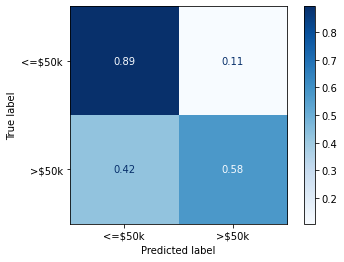

In [135]:
from sklearn.metrics import ConfusionMatrixDisplay

#Plot the confusion matrix
labels = ['<=$50k', '>$50k']
# normalize = true will show values in percentages
ConfusionMatrixDisplay.from_predictions(y_test, Knn_predict_test, display_labels=labels, cmap='Blues', normalize='true');

In [136]:
# Evaluate the model's performance - on testing data
knn_accuracy_score_test = knn_pipe.score(X_test_processed, y_test)


knn_accuracy_score_train = knn_pipe.score(X_train_processed, y_train)

print(f"Knn accuracy test score: {knn_accuracy_score_test}")
print(f"Knn accuracy train score: {knn_accuracy_score_train}")

Knn accuracy test score: 0.8154886293792256
Knn accuracy train score: 0.8943119416441275


## **Random Forest Model**

In [137]:
# Random Forest Classifier
# max_depth of 6 provided the most optimal results in our model

rf = RandomForestClassifier(max_depth=6, random_state=42)

In [138]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [139]:
rf.fit(X_train_processed, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

### **Classification Report**

In [140]:
rf_predict_train = rf.predict(X_train_processed)

In [141]:
rf_predict_test= rf.predict(X_test_processed)

In [142]:
test_report = classification_report(y_test, rf_predict_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      6159
           1       0.86      0.43      0.57      1976

    accuracy                           0.84      8135
   macro avg       0.85      0.70      0.74      8135
weighted avg       0.85      0.84      0.82      8135



In [143]:
rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)

print(f"Random Forest accuracy train score: {rf_train_score}")
print(f"Random Forest accuracy test score: {rf_test_score}")

Random Forest accuracy train score: 0.8392754692238341
Random Forest accuracy test score: 0.844499078057775


### **Production Model**

The **KNN model** yielded better results in predicting whether a person makes over 50k a year. 

Due to it's classification report, we can see how it's precision score (81%) compares to the Random forest model (86%) of predicting a salary over 50K. The recall suggests that the Random Forest model only predicted the outcome correctly for 43% while KNN model reached 58%. 

The KNN model has the closest F1 score to 1, indicating better performance in predicting whether or not a person makes over 50k.

# **Notes**

Integer - Numerical
*   age
*   capital-gain
*   capital-loss
*   hours-per-week

Object - Categorical
*   workclass
*   marital-status
*   native-country
*   occupation
*   relationship
*   race
*   salary
*   sex



No missing values since dataset seems to be filled with unknown values initially using 0. These values will be addressed with SimpleImputer using the Mode Strategy. Using the mode strategy should be best since the data in itself is categorical.


*   **Columns**: Native Country, Occupation, Work Class contain large amounts of data with unknown values. 





*   Dropped 24 duplicate rows
*   Dropping fnlwgt & education-num as they contain mostly unique values. Since columns will have no value to our analysis.



**Salary Prediction Data Dictionary**

*  **age**: continuous
*   **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked


*   **fnlwgt**: continuous

*  **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
*   **education-num**: continuous

*   **marital-statu**s: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
*   **Customer Name**: Name of the Customer


*   **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces


*   **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried


*   **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black



*   **sex**: Female, Male
*   **capital-gain**: continuous



*  **capital-loss**: continuous
*   **hours-per-week**: continuous


*   **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands

*   **salary**: <=50K or >50K